# Implementation and Comparison of AES & DES Encryption

Objectives:

* ✔ Understand DES and AES encryption principles.
* ✔ Implement DES and AES in Python.
* ✔ Compare their performance and security.
* ✔ Perform hands-on tasks to reinforce learning.







Introduction to AES & DES

🔹 Data Encryption Standard (DES)
* Symmetric block cipher (same key for encryption & decryption).
* Uses 56-bit key and encrypts 64-bit blocks.
* Feistel Network structure, 16 rounds.
* Weakness: Small key size → vulnerable to brute-force attacks.

🔹 Advanced Encryption Standard (AES)
* Symmetric block cipher (modern replacement for DES).
* Uses 128, 192, or 256-bit keys and encrypts 128-bit blocks.
* Substitution-Permutation Network (SPN) structure, 10-14 rounds.
* More secure & faster than DE

Comparison:
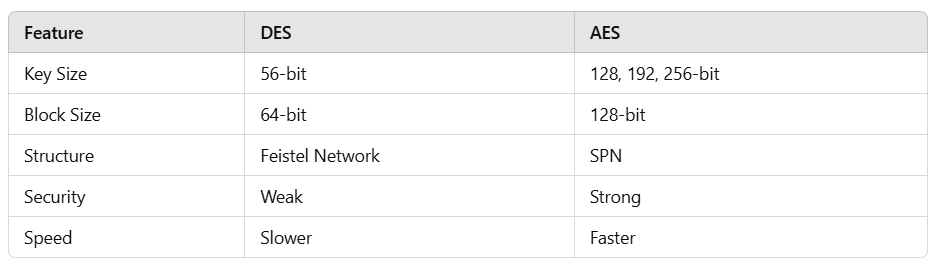

✅ Task 1 1 (Short Answer):
1️⃣ Why is DES considered weak?
2️⃣ Where is AES commonly used?

# Step 1: Implementing DES (10 min)

In [1]:
! pip install pycryptodome

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 12.1 MB/s eta 0:00:00


# Following code imports the library for performing enecryption and decryption.

We will use the following library:
https://pycryptodome.readthedocs.io/en/latest/



In [2]:
from Crypto.Cipher import DES
import base64


In [3]:

def pad(text, block_size):
    while len(text) % block_size != 0:
        text +=  ' '
    return text


# The function encrypts a given plaintext using DES (Data Encryption Standard) in ECB mode. It first pads the plaintext to a multiple of 8 bytes, encrypts it using the provided key, and returns the Base64-encoded ciphertext.

In [4]:

def des_encrypt(plain_text, key):
    cipher = DES.new(key, DES.MODE_ECB)
    plain_text_padded_text = pad(plain_text, DES.block_size)
    encrypted_text = cipher.encrypt(plain_text_padded_text.encode())
    return base64.b64encode(encrypted_text).decode()


# This code defines a function des_encrypt that encrypts a given plaintext using the DES encryption algorithm in ECB mode, padding the plaintext to match the block size before encryption.



In [5]:

def des_decrypt(encrypted_text, key):
    cipher = DES.new(key, DES.MODE_ECB)
    decrypted_text = cipher.decrypt(base64.b64decode(encrypted_text)).decode().strip()
    return decrypted_text


In [6]:

key = b'SecretKe'
plain_text = "HelloCrypto"
encrypted = des_encrypt(plain_text, key)
print("Encrypted text:", encrypted)
decrypted = des_decrypt(encrypted, key)
print("Decrypted text:", decrypted)

Encrypted text: HQqgsqSEljgBPH7L4con0w==
Decrypted text: HelloCrypto


✅ Task 2:  Modify the above code to accept user input for plaintext and key.

Hint - use input()

Following  code imports the necessary modules to perform AES encryption and decryption, including padding and unpadding functions, as well as base64 encoding/decoding.

In [7]:
from Crypto.Cipher import AES
import base64

Following code defines a function aes_encrypt that encrypts a given plaintext using the AES algorithm in ECB mode (we will learn the ECB mode later), pads the plaintext to match the block size, and then returns the encrypted text encoded in base64.

In [8]:
# AES Encryption
def aes_encrypt(plain_text, key):
    cipher = AES.new(key, AES.MODE_ECB)
    print (type(plain_text))
    padded_text = pad(plain_text, AES.block_size)
    encrypted_text = cipher.encrypt(padded_text.encode())
    return base64.b64encode(encrypted_text).decode()


Following code defines a function aes_decrypt that decrypts a given base64-encoded ciphertext using the AES algorithm in ECB mode, then unpads the decrypted text and returns the plaintext.









In [9]:
# AES Decryption
def aes_decrypt(encrypted_text, key):
    cipher = AES.new(key, AES.MODE_ECB)
    decrypted_text = cipher.decrypt(base64.b64decode(encrypted_text)).decode().strip()
    return decrypted_text


In [10]:
# Testing AES
key = b'16bytekeylengthp'
plain_text = "HelloCrypto"
encrypted_text = aes_encrypt(plain_text, key)
decrypted_text = aes_decrypt(encrypted_text, key)

# Print the results
print(f"AES Encrypted: {encrypted_text}")
print(f"AES Decrypted: {decrypted_text}")


<class 'str'>
AES Encrypted: GivAPqcdNy0zbxUWJl3mdw==
AES Decrypted: HelloCrypto


✅ Task 3: Modify the AES code to accept user input for plaintext and key.

✅ Task 4: Change the AES key size to 24 bytes and run the program.

Following  code measures the time taken to encrypt the plaintext "HelloCrypto" using the DES encryption algorithm by recording the start and end times and then printing the elapsed time.









In [11]:
import time

# Measure DES encryption time
key = b'SecretKe'
plain_text = "HelloCryptoCrypto"
start = time.time()
des_encrypt(plain_text, key)
end = time.time()
print(f"DES Encryption Time: {end - start:.2f} sec")




DES Encryption Time: 0.00 sec


✅ Task 5: In the following cell, write the Python code to measure the time taken by AES encryption *algorithm*

In [13]:
key = b'16bytekeylengthp'
plain_text = "HelloCrypto"

start_time = time.time()
aes_encrypt(plain_text, key)
end_time = time.time()

print(f"AES Encryption Time: {end_time - start_time:.6f} seconds")


<class 'str'>
AES Encryption Time: 0.000387 seconds


Following code encrpts the image using AES algorithm.
The image file is named as 'input.jpg'.

✅ Task 6: Test the code for different types of images and show the original abd cypherimage. Is your encryption method, good or bad?
Save your image as file name - input.jpg or change the code to adjust for any images.




Encrypted image saved as encrypted_ecb.png


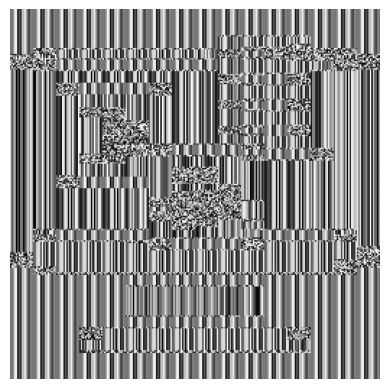

In [17]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt


def load_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img_data = np.array(img)
    return img, img_data

def save_image(image_data, output_path):
    img = Image.fromarray(image_data)
    img.save(output_path)

def encrypt_ecb(image_data, key):
    cipher = AES.new(key, AES.MODE_ECB)
    shape = image_data.shape
    flat_data = image_data.flatten()
    padded_data = pad(flat_data.tobytes(), AES.block_size)
    encrypted_data = cipher.encrypt(padded_data)
    encrypted_array = np.frombuffer(encrypted_data, dtype=np.uint8)[:flat_data.size]
    return encrypted_array.reshape(shape)

def main():
    input_image = '/content/img1.png'
    output_image = 'encrypted_ecb.png'
    key = os.urandom(16)

    img, img_data = load_image(input_image)
    encrypted_data = encrypt_ecb(img_data, key)
    save_image(encrypted_data, output_image)
    print(f"Encrypted image saved as {output_image}")

if __name__ == "__main__":
    main()

img = Image.open('encrypted_ecb.png')
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

**Important: Lab Logbook requirement**
Provide the following in your lab-log book.
1. Sample of plain and cypher text for AES and DES
2. Real image and cipher image for the image of any choice using AES.
3. Explain in one word - 'YES' or 'NO' whether your encryption method for the images is good.

In [ ]:

#  NO, ECB mode is highly insecure for images, as patterns in the image will be reflected in the ciphertext.
